# Chapter 11. Systems of Nonlinear Differential Equations

### Contents

* Autonomous Systems
* Stability of Linear Systems
* Linearization and Local Stability
* Autonomous Systems as Mathematical Models
* Periodic Solutions, Limit Cycles, and Global Stability

## 11.1 Autonomous Systems

A system of first-order differential equations is called **autonomous** when the system can be written in the form

>$
\begin{align*}
 \frac{dx_1}{dt} &=g_1(x_1,x_2,\cdots,x_n) \\ 
 \frac{dx_2}{dt} &=g_2(x_1,x_2,\cdots,x_n) \\ 
    & \;\vdots \\ 
 \frac{dx_n}{dt} &=g_n(x_1,x_2,\cdots,x_n)
\end{align*}
$

Notice that the independent variable $t$ does not appear explicitly on the right-hand side of each differential
equation.

* **Second-Order DE as a System**

  Any second-order differential equation $x''=g(x,x')$ can be written as an autonomous system. 
  If we let $y=x'$, the second-order differential equation becomes the system of two first-order equations
  
  >$
  \begin{align*}
     x' &= y\\ 
     y' &= g(x,y) 
  \end{align*}
  $
  
  ---
  
  **Example:** The displacement angle $\theta$ for a pendulum satisfies the nonlinear second-order
  differential equation
  
  >$\displaystyle\frac{d^2 \theta}{dt^2} +\frac{g}{l}\sin\theta=0$
  
  If we let $x=\theta$ and $y=\theta'$, this second-order differential equation can be written as the autonomous system
  
  >$
  \begin{align*}
     x' &= y\\ 
     y' &= -\frac{g}{l}\sin x
  \end{align*}
  $

  ---
  
* **Plane Autonomous System**
  
  When $n=2$, the system is called a **plane autonomous system**, and we write the system as
  
  >$\displaystyle
  \begin{align*}
     \frac{dx}{dt} &= P(x,y)\\ 
     \frac{dy}{dt} &= Q(x,y)
  \end{align*}
  $
  
  If $P(x,y)$, $Q(x,y)$, and the first-order partial derivatives $\partial P/\partial x$,
  $\partial P/\partial y$, $\partial Q/\partial x$, and $\partial Q/\partial y$ are continuous in a
  region $R$ of the plane, then a solution to the plane autonomous system that satisfies 
  $\mathbf{x}(0)=\mathbf{x}_0$ is unique and one of three basic types:
  
    * A **constant solution**, $\mathbf{x}(t)=\mathbf{x}_0$ for all $t$. 
    A constant solution is called a **critical** or **stationary point**. Note that since $\mathbf{x}'=\mathbf{0}$,
    a critical point is a solution of the system of algebraic equations
    
    >$\displaystyle
      \begin{align*}
         P(x,y) &= 0\\ 
         Q(x,y) &= 0
      \end{align*}
    $
    
    * An **arc**, $\mathbf{x}(t)$ - a plane curve that does not cross itself
    
    <img src="figures/ch11_figure01.png" width="200">
    
    * A **periodic solution** or **cycle**, $\mathbf{x}(t +p)=\mathbf{x}(t)$
    
    <img src="figures/ch11_figure02.png" width="100"> 

**Example:** Find all criticl points of the following plane autonomous system

>$
\begin{align*}
 x'&= x^2 +y^2 -6\\ 
 y'&= x^2 -y 
\end{align*}
$

### Exercises 11.1

* 1

## 11.2 Stability of Linear Systems

If $\mathbf{x}_1$ is a critical point of a plane autonomous system and $\mathbf{x}=\mathbf{x}(t)$ is a solution
satisfying $\mathbf{x}(0)=\mathbf{x}_0$, 

when $\mathbf{x}_0$ is placed near $\mathbf{x}_1$.

<img src="figures/ch11_figure03.png" width="150">

**(a)** It may return to the critical point <br>
**(b)** It may remain close to the critical point without returning <br>
**(c)** It may move away from the critical point

* **Stability Analysis**

  A careful geometric analysis of the solutions to the *linear* plane autonomous system
  
  >$
    \begin{align*}
       x'&= ax +by\\ 
       y'&= cx +dy
    \end{align*}
   $
  
  in terms of the eigenvalues and eigenvectors of the coefficient matrix
  
  >$\mathbf{A}=
    \begin{pmatrix}
     a & b\\ 
     c & d
    \end{pmatrix}
   $
   
  drives the stabilty analysis. 
  
  To ensure that $\mathbf{x}_0=(0,\,0)$ is the only critical point,
  we will assume that the determinant $\Delta = ad -bc \neq 0$. If $\tau = a + d$ is the trace of matrix $\mathbf{A}$,
  then the characteristic equation $\mathrm{det}(\mathbf{A} -\lambda\mathbf{I})=0$ can be rewritten as
  
  >$\lambda^2 -\tau\lambda +\Delta =0$
  
  Therefore the eigenvalues of $\mathbf{A}$ are 
  
  >$\displaystyle\lambda =\frac{\tau \pm \sqrt{\tau^2 -4\Delta}}{2}$
  
  and the usual three cases for these roots occur according to whether $\tau^2 -4\Delta$ is positive, negative,
  or zero.

---

**Example:** Find the eigenvalues of the linear system

>$
    \begin{align*}
       x'&= -x +y\\ 
       y'&= cx -y
    \end{align*}
 $
 
in terms of $c$, and use a numerical solver to discover the shapes of solutions corresponding to the cases
$c=\frac{1}{4}$, $4$, $0$, and $-9$. $\mathbf{A}$ has trace $\tau=-2$ and determinant $\Delta=1 -c$, 
and so the eigenvalues are

>$
  \lambda =-1 \pm \sqrt{c}
 $
 
The nature of the eigenvalues is therefore determined by the value of $c$ 

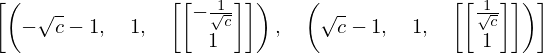

In [1]:
%matplotlib inline
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

sp.init_printing(use_unicode=True)

c = sp.Symbol('c')
A = sp.Matrix([[-1, 1], [c, -1]])
A.eigenvects()

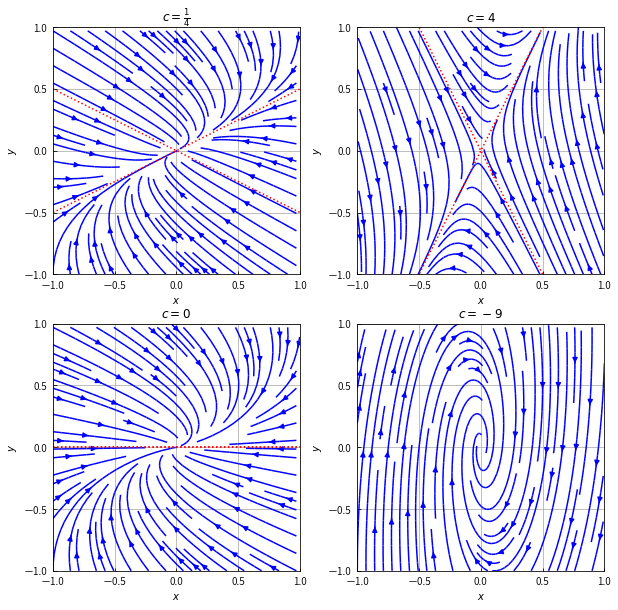

In [2]:
w = 1
xp = np.linspace(-w, w, 50)
yp = np.linspace(-w, w, 50)
x, y = np.meshgrid(xp, yp)

c_ = np.array([1/4, 4, 0, -9])
c_title = [r'$c=\frac{1}{4}$', r'$c=4$', r'$c=0$', r'$c=-9$']

fig = plt.figure(figsize=(10, 10))

for i in range(4):
    
    ax = fig.add_subplot(2, 2, i +1)

    xdot = -x +y
    ydot = c_[i]*x -y
    
    if c_[i] >= 0.0:
        y_1 = -np.sqrt(c_[i])*xp
        y_2 = np.sqrt(c_[i])*xp
        ax.plot(xp, y_1, 'r:', xp, y_2, 'r:')    
    ax.streamplot(x, y, xdot, ydot, color='blue')

    ax.set_title(c_title[i])

    ax.axis((-w, w, -w, w))
    ax.set_aspect(aspect='equal')
    ax.grid()
    
    ax.tick_params(axis='both', direction='in', pad=6)     
    ax.xaxis.set_ticks(np.linspace(-w, w, 5))
    ax.yaxis.set_ticks(np.linspace(-w, w, 5))

    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')     

---

Trajectory behaviors in phase portraits can be explained with eigenvalue-eigenvector of $\mathbf{A}$

#### **Real Distinct Eigenvalues** ($\tau^2 -4\Delta > 0$)

>$
\begin{align*}
 \mathbf{x}(t)&= c_1\mathbf{k}_1 e^{\lambda_1 t} +c_2\mathbf{k}_2 e^{\lambda_2 t}\\ 
 &\;\big\Downarrow \;\lambda_1 >\lambda_2\\ 
 &= e^{\lambda_1 t} \left[c_1\mathbf{k}_1 +c_2\mathbf{k}_2 e^{(\lambda_2 -\lambda_1)t} \right ] \\
 &\;\big\Downarrow \;\,t \to \infty\\
 &\simeq c_1\mathbf{k}_1 e^{\lambda_1 t}
\end{align*}
 $
 
* **Both eigenvalues negative** ($\tau^2 -4\Delta > 0$, $\tau<0$, $\Delta>0$) 
   
  **Stable Node:** Since both eigenvalues are negative, it follows that 
  $\lim_{t \to \infty} \mathbf{x}(t)=\mathbf{0}$ in the direction of $\mathbf{k}_1$ when $c_1 \neq 0$ or
  in the direction of $\mathbf{k}_2$ when $c_1=0$
    
* **Both eigenvalues positive** ($\tau^2 -4\Delta > 0$, $\tau>0$, $\Delta>0$)
   
   **Unstable Node:** $\mathbf{x}(t)$ becomes unbounded in the direction of 
   $\mathbf{k}_1$ when $c_1 \neq 0$ or in the direction of $\mathbf{k}_2$ when $c_1=0$ 
   
* **Eigenvalues have opposite signs** ($\tau^2 -4\Delta > 0$, $\Delta<0$)
   
   **Saddle Point:** When $c_1=0$, $\mathbf{x}(t)$ will approach $\mathbf{0}$ along the line determined by 
   $\mathbf{k}_2$. If $\mathbf{x}(0)$ does not lie on the line determined by $\mathbf{k}_2$, the direction
   determined by $\mathbf{k}_1$ serves as an asymtote for $\mathbf{x}(t)$ 

---

**Example:** Classify the critical point $(0,0)$ of each of the following linear system 
$\mathbf{x}'=\mathbf{A}\mathbf{x}$ as either a stable node, an unstable node, or a saddle point

>(a) $\begin{pmatrix} -2 & -2\\ -2 & -5 \end{pmatrix}$, $\;$
(b) $\begin{pmatrix} -1 & -2\\ \;\;3 & \;\;4 \end{pmatrix}$, $\;$
(c) $\begin{pmatrix} 2 & -1\\ 3 & -2 \end{pmatrix}$

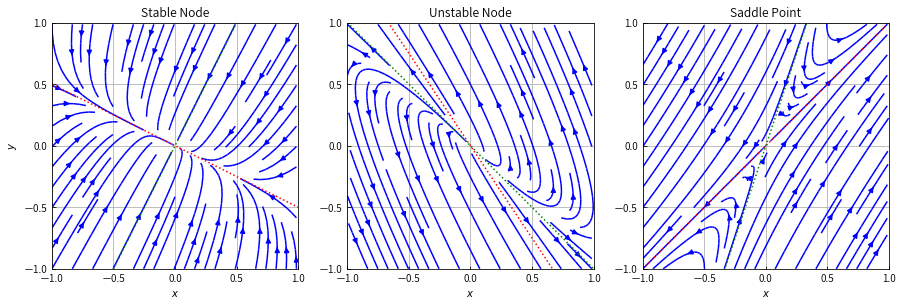

In [3]:
w = 1
xp = np.linspace(-w, w, 6)
yp = np.linspace(-w, w, 6)
x, y = np.meshgrid(xp, yp)

A = np.array([[[-2, -2], [-2, -5]],[[-1, -2], [3, 4]],[[2, -1], [3, -2]]])
A_title = ['Stable Node', 'Unstable Node', 'Saddle Point']

fig = plt.figure(figsize=(15, 5))

for i in range(3):
    xdot = A[i,0,0]*x +A[i,0,1]*y
    ydot = A[i,1,0]*x +A[i,1,1]*y

    lamda, v = np.linalg.eig(A[i])

    if lamda[0] >= lamda[1]:
        y_1 = v[1,0]/v[0,0]*xp
        y_2 = v[1,1]/v[0,1]*xp
    else:
        y_1 = v[1,1]/v[0,1]*xp
        y_2 = v[1,0]/v[0,0]*xp       

    ax = fig.add_subplot(1, 3, i +1)
    
    ax.plot(xp, y_1, 'r:', xp, y_2, 'g:')    
    ax.streamplot(x, y, xdot, ydot, color='blue')

    ax.set_title(A_title[i])

    ax.axis((-w, w, -w, w))
    ax.set_aspect(aspect='equal')
    ax.grid()
    
    ax.tick_params(axis='both', direction='in', pad=5)     
    ax.xaxis.set_ticks(np.linspace(-w, w, 5))
    ax.set_xlabel(r'$x$')
    
    ax.yaxis.set_ticks(np.linspace(-w, w, 5))
    if i == 0:
        ax.set_ylabel(r'$y$')

#### **A Repeated Real Eigenvalue** ($\tau^2 -4\Delta = 0$)

The general solution takes on one of two different forms depending on whether **one** or **two** linearly independent
eigenvectors can be found for the repeated eigenvalues $\lambda_1$

* **Two linearly independent eigenvectors**

  If $\mathbf{k}_1$ and $\mathbf{k}_2$ are two linearly independent eigenvectors corresponding to $\lambda_1$,
  then the general solution is given by
  
  >$\mathbf{x}(t)=c_1\mathbf{k}_1 e^{\lambda_1 t} +c_2\mathbf{k}_2 e^{\lambda_1 t}=
    \left(c_1\mathbf{k}_1 + c_2\mathbf{k}_2 \right) e^{\lambda_1 t}$
   
  If $\lambda_1<0$, the $\mathbf{x}(t)$ approaches $\mathbf{0}$ along the line determined by the vector
  $c_1\mathbf{k}_1 + c_2\mathbf{k}_2$ and the critical point is a **degenerate stable node**.
  The arrows are reversed when $\lambda_1>0$, and the critical point is a **degenerate unstable node**
  
* **A single linearly independent eigenvectors**
  
  When only a single linearly independent eigenvector $\mathbf{k}_{11}$ exists, the general solution is 
  given by
  
  >$\begin{align*}
     \mathbf{x}(t)&=c_1\mathbf{k}_{11} e^{\lambda_1 t} +c_2\left(\mathbf{k}_{11} te^{\lambda_1 t} 
            +\mathbf{k}_{12} e^{\lambda_1 t}\right)\\
         &=te^{\lambda_1 t}\left[c_2 \mathbf{k}_{11} +\frac{1}{t} \left(c_1\mathbf{k}_{11} 
            +c_2\mathbf{k}_{12}\right) \right]
    \end{align*}$
    
  where $(\mathbf{A} -\lambda_1\mathbf{I})\mathbf{k}_{12}=\mathbf{k}_{11}$. 
  If $\lambda_1<0$, then $\lim_{t \to \infty} te^{\lambda_1 t}=0$ and it follows that $\mathbf{x}(t)$
  approaches $\mathbf{0}$ in the line determined by $\mathbf{k}_{11}$. The critical point is
  again a **degenerate stable node**. When $\lambda_1>0$, $\mathbf{x}(t)$ becomes unbounded as $t$ increases, 
  and the critical point is a **degenerate unstable node** 

---

**Example:** Classify the critical point $(0,0)$ of each of the following linear system 
$\mathbf{x}'=\mathbf{A}\mathbf{x}$ 

>(a) $\begin{pmatrix} 1 & 0\\ 0 & 1 \end{pmatrix}$, $\;$
(b) $\begin{pmatrix} 3 & -18\\ 2 &\; -9 \end{pmatrix}$, $\;$
(c) $\begin{pmatrix} \;\;2 & 4\\ -1 & 6 \end{pmatrix}$

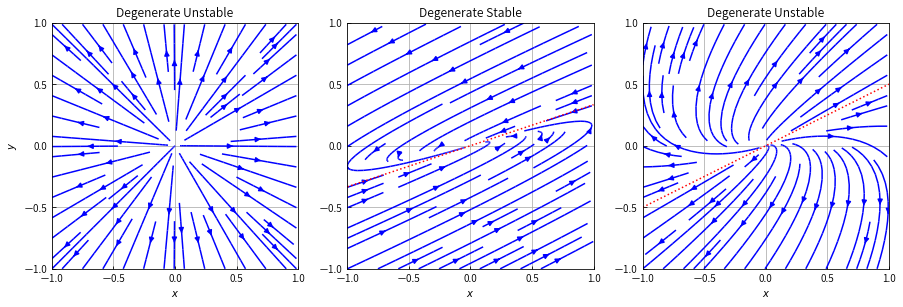

In [4]:
w = 1
xp = np.linspace(-w, w, 6)
yp = np.linspace(-w, w, 6)
x, y = np.meshgrid(xp, yp)

A = np.array([[[1, 0], [0, 1]],[[3, -18], [2, -9]],[[2, 4], [-1, 6]]])
A_title = ['Degenerate Unstable', 'Degenerate Stable', 'Degenerate Unstable']

fig = plt.figure(figsize=(15, 5))

for i in range(3):

    ax = fig.add_subplot(1, 3, i +1)
    
    xdot = A[i,0,0]*x +A[i,0,1]*y
    ydot = A[i,1,0]*x +A[i,1,1]*y

    lamda, v = np.linalg.eig(A[i])
    
    if i != 0:
        y_1 = v[1,0]/v[0,0]*xp
        ax.plot(xp, y_1, 'r:')
            
    ax.streamplot(x, y, xdot, ydot, color='blue')

    ax.set_title(A_title[i])

    ax.axis((-w, w, -w, w))
    ax.set_aspect(aspect='equal')
    ax.grid()
    
    ax.tick_params(axis='both', direction='in', pad=5)     
    ax.xaxis.set_ticks(np.linspace(-w, w, 5))
    ax.set_xlabel(r'$x$')
    
    ax.yaxis.set_ticks(np.linspace(-w, w, 5))
    if i == 0:
        ax.set_ylabel(r'$y$')

---

#### **Complex Eigenvalues** ($\tau^2 -4\Delta < 0$)

If $\lambda_1=\alpha +i\beta$ and $\bar{\lambda}_1$ are the complex eigenvalues and 
$\mathbf{k}_1=\mathbf{b}_1 +i\mathbf{b}_2$ is a complex eigenvector corresponding to $\lambda_1$,
the general solution can be written as $\mathbf{x}=c_1\mathbf{x}_1 +c_2\mathbf{x}_2$

>$\mathbf{x}_1(t)=e^{\alpha t}\left(\mathbf{b}_1\cos\beta t -\mathbf{b}_2\sin\beta t\right)\;$ and 
 $\;\mathbf{x}_2(t)=e^{\alpha t}\left(\mathbf{b}_2\cos\beta t +\mathbf{b}_1\sin\beta t\right)$
 
* **Pure imaginary roots** ($\tau^2 -4\Delta < 0$, $\tau=0$)

  **Center:** When $\alpha=0$, all solutions are ellipses with center at the origin and are periodic 
  with period $p=2\pi/\beta$. The critical point is called a **center**
  
* **Nonezero real part** ($\tau^2 -4\Delta < 0$, $\tau\neq 0$)  

  **Spiral Point:** When $\alpha<0$, $e^{\alpha t \to 0}$, and the elliptical-like solution spirals closer
  and closer to the origin. The critical point is called a **stable spiral point**. When $\alpha>0$, the 
  effect is the opposite. An elliptical-like solution is driven farther and farther from the origin,
  and the critical point is now called an **unstable spiral point**


---

**Example:** Classify the critical point $(0,0)$ of each of the following linear system 
$\mathbf{x}'=\mathbf{A}\mathbf{x}$ 

>(a) $\begin{pmatrix} -1 & 2\\ -1 & 1 \end{pmatrix}$,$\;$
(b) $\begin{pmatrix} -1 & -4\\ \;\;1 & -1 \end{pmatrix}$

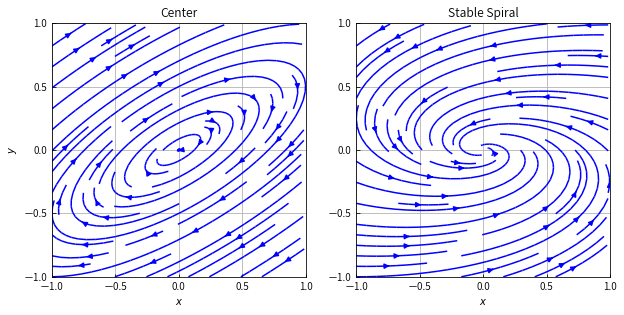

In [ ]:
w = 1
xp = np.linspace(-w, w, 6)
yp = np.linspace(-w, w, 6)
x, y = np.meshgrid(xp, yp)

A = np.array([[[-1, 2], [-1, 1]],[[-1, -4], [1, -1]]])
A_title = ['Center', 'Stable Spiral']

fig = plt.figure(figsize=(10, 5))

for i in range(2):

    ax = fig.add_subplot(1, 2, i +1)
    
    xdot = A[i,0,0]*x +A[i,0,1]*y
    ydot = A[i,1,0]*x +A[i,1,1]*y

    lamda, v = np.linalg.eig(A[i])
            
    ax.streamplot(x, y, xdot, ydot, color='blue')

    ax.set_title(A_title[i])

    ax.axis((-w, w, -w, w))
    ax.set_aspect(aspect='equal')
    ax.grid()
    
    ax.tick_params(axis='both', direction='in', pad=5)     
    ax.xaxis.set_ticks(np.linspace(-w, w, 5))
    ax.set_xlabel(r'$x$')
    
    ax.yaxis.set_ticks(np.linspace(-w, w, 5))
    if i == 0:
        ax.set_ylabel(r'$y$')

<img src="figures/ch11_figure04.png" width="500">

For a linear plane autonomous system $\mathbf{x}'=\mathbf{A}\mathbf{x}$ with $\mathrm{det}\,\mathbf{A}\neq 0$,
let $\mathbf{x}$ denote the solution that satisfies the initial condition $\mathbf{x}(0)=\mathbf{x}_0$, where
$\mathbf{x}_0\neq\mathbf{0}$

1. $\lim_{t \to \infty}\mathbf{x}(t)=\mathbf{0}$ if and only if the eigenvalues of $\mathbf{A}$ have negative
   real parts. This will occur when $\Delta>0$ and $\tau<0$
1. $\mathbf{x}(t)$ is periodic if and only if the eigenvalues of $\mathbf{A}$ are pure imaginary. This will
   occur when $\Delta>0$ and $\tau=0$
1. In all other cases, given any neighborhood of the origin, there is at least one $\mathbf{x}_0$ in the neighborhood  
   for which $\mathbf{x}(t)$ becomes unbounded as $t$ increases

### Exercises 11.2

* 1

## 11.3 Linearization and Local Stability

Here we will use linearization as a means of analyzing nonlinear DEs and nonlinear systems; the idea is to replace them
by linear DEs and linear systems

Let $\mathbf{x}_1$ be a critical point of an autonomous system, and let $\mathbf{x}=\mathbf{x}(t)$ denote the solution
that satisfies the initial condition $\mathbf{x}(0)=\mathbf{x}_0$, where $\mathbf{x}\neq\mathbf{x}_1$.

* $\mathbf{x}_1$ is a **stable critical point**
  
  when, given any $\rho > 0$, there is a $r>0$ such that if $\mathbf{x}_0$ satisfies $|\mathbf{x}_0 -\mathbf{x}_1|<r$,
  then $\mathbf{x}(t)$ satisfies $|\mathbf{x}(t) -\mathbf{x}_1|<\rho$ for all $t>0$. If, in addition, 
  $\lim_{t \to \infty} \mathbf{x}(t)=\mathbf{x}_1$ whenever $|\mathbf{x}_0 -\mathbf{x}_1|<r$, we call
  $\mathbf{x}_1$ an **asymptotically stable critical point**
  
* $\mathbf{x}_1$ is a **unstable critical point**

  if there is $\rho>0$ with the property that, for any $r>0$, there is at least one $\mathbf{x}_0$ that
  satisfies $|\mathbf{x}_0 -\mathbf{x}_1|<r$, yet the corresponding solution $\mathbf{x}(t)$ satisfies 
  $|\mathbf{x}(t) -\mathbf{x}_1|\geq\rho$ for at least one $t>0$

---
**Example:** Show that $(0,0)$ is a stable critical point of the nonlinear plane autonomous system

>$
\begin{align*}
  x' &= -y -x\sqrt{x^2 +y^2}\\ 
  y' &= x -y\sqrt{x^2 +y^2}
\end{align*}
$

From the formulas $r^2=x^2 +y^2$ and $\theta=\tan^{-1}(y/x)$, we obtain

>$\displaystyle
  \frac{dr}{dt}=\frac{1}{r}\left(x\frac{dx}{dt}+y\frac{dy}{dt} \right),\;
  \frac{d\theta}{dt}=\frac{1}{r^2}\left( -y\frac{dx}{dt} +x\frac{dy}{dt}\right)$
  
Substituting for $dx/dt$ and $dy/dt$ in the expressions for $dr/dt$ and $d\theta/dt$, we obtain

>$
\begin{align*}
  \frac{dr}{dt} &= -r^2\\ 
  \frac{d\theta}{dt} &= 1
\end{align*}
$

Using separation of variables, we see that the solution of the system is

>$\displaystyle r=\frac{1}{t +c_1},\;\;\theta=t +c_2$

for $r\neq 0$. If $\mathbf{x}(0)=(r_0,\theta_0)$ is the initial condition in polar coordinates, then

>$\displaystyle r=\frac{r_0}{r_0 t +1},\;\;\theta=t +\theta_0$

Note that $r\leq r_0$ for $t\geq 0$, and $r$ approaches $0$ as $t$ increases. Therefore, given $\rho>0$,
a solution that starts less than $\rho$ from the origin remains within $\rho$ of the origin for all $t\geq 0$.
Hence the critical point $(0,0)$ is asymptotically stable

---
**Example:** When expressed in polar coordinates, a plane autonomous system takes the form

>$
\begin{align*}
  \frac{dr}{dt} &= 0.05\,r(3 -r)\\ 
  \frac{d\theta}{dt} &= -1
\end{align*}
$

Show that $(x,y)=(0,0)$ is unstable critical point

We see that $dr/dt=0$ when $r=0$ and can conclude that $(x,y)=(0,0)$ is a critical point. The differential
equation can be solved using separation of variables. If $r(0)=r_0$ and $r_0\neq 0$, then

>$\displaystyle r=\frac{3}{1 +c_0 e^{-0.15t}}$

where $c_0=(3 -r_0)/r_0$. Since

>$\displaystyle\lim_{t \to \infty}\frac{3}{1 +c_0 e^{-0.15t}}=3$,

it follows that no matter how close to $(0,0)$ a solution starts, the solution will leave a disk of radius $\epsilon$
about the origin. Therefore $(0,0)$ is an unstable critical point

---

#### **Linearization**

We replace the term $\mathbf{g}(\mathbf{x})$ in the original autonomous system $\mathbf{x}'=\mathbf{g}(\mathbf{x})$
by a linear term $\mathbf{A}(\mathbf{x} -\mathbf{x}_1)$ that most closely approximates $\mathbf{g}(\mathbf{x})$
in a neighborhood of $\mathbf{x}_1$. This replacement process is called **linearization**

When $\mathbf{x}_1$ is a critical point of a plane autonomous system

>$
\begin{align*}
 x' &= P(x,y)\\ 
 y' &= Q(x,y)
\end{align*}
$,

$P(x_1,y_1)=Q(x_1,y_1)=0$ and we have

>$
\begin{align*}
 x' &= P(x,y)\simeq \left.\frac{\partial P}{\partial x}\right|_{(x_1,y_1)}(x -x_1)
         +\left.\frac{\partial P}{\partial y}\right|_{(x_1,y_1)}(y -y_1)\\ 
 y' &= Q(x,y)\simeq \left.\frac{\partial Q}{\partial x}\right|_{(x_1,y_1)}(x -x_1)
         +\left.\frac{\partial Q}{\partial y}\right|_{(x_1,y_1)}(y -y_1)
\end{align*}
$

The original system $\mathbf{x}'=\mathbf{g}(\mathbf{x})$ may be approximated in a neighborhood of $\mathbf{x}_1$
by the linear system $\mathbf{x}'=\mathbf{A}(\mathbf{x} -\mathbf{x}_1)$, where

>$\displaystyle\mathbf{A}=
\begin{pmatrix}
 \left.\frac{\partial P}{\partial x}\right|_{(x_1,y_1)} & \left.\frac{\partial P}{\partial y}\right|_{(x_1,y_1)}\\ 
 \left.\frac{\partial Q}{\partial x}\right|_{(x_1,y_1)} & \left.\frac{\partial Q}{\partial y}\right|_{(x_1,y_1)}
\end{pmatrix}
$

#### **Stability Criteria for Plane Autonomous System**

1. If the eigenvalues of $\mathbf{A}=\mathbf{g}'(\mathbf{x}_1)$ have negative real part, then $\mathbf{x}_1$ is 
   an asymptotically stable critical point
1. If the eigenvalues of $\mathbf{A}=\mathbf{g}'(\mathbf{x}_1)$ have positive real part, then $\mathbf{x}_1$ is 
   an unstable critical point   

**Example:** Classify the criticl points of the following plane autonomous system

>$
\begin{align*}
 x'&= x^2 +y^2 -6\\ 
 y'&= x^2 -y 
\end{align*}
$

The critical points are $(\sqrt{2},2)$ and $(-\sqrt{2},2)$, the Jocobian matrix is

>$
\mathbf{g}'(\mathbf{x})=
\begin{pmatrix}
 2x & 2y\\ 
 2x &-1 
\end{pmatrix}
$

and so

>$
\mathbf{A}_1=\mathbf{g}'((\sqrt{2},2))=
\begin{pmatrix}
 2\sqrt{2} & \;\;4\\ 
 2\sqrt{2} &-1 
\end{pmatrix}\;
$ and
>$\;
\mathbf{A}_2=\mathbf{g}'((-\sqrt{2},2))=
\begin{pmatrix}
 -2\sqrt{2} & \;\;4\\ 
 -2\sqrt{2} &-1 
\end{pmatrix}
$

Since the determinant of $\mathbf{A}_1$ is negative, $\mathbf{A}_1$ has a positive real eigenvalue.
Therefore $(\sqrt{2},2)$ is an unstable critical point. $\mathbf{A}_2$ has a positive determinant and 
a negative trace, and so both eigenvalues have negative real parts. It follows that $(-\sqrt{2},2)$ is a
stable critical point

#### Classifying Critical Points

<img src="figures/ch11_figure05.png" width="500">

**Example:** The second-order differential equation $mx'' +kx +k_1x^3 =0$, for $k>0$, represents a general
model for the free, undamped oscillations of a mass $m$ attached to a nonlinear spring.
If $k=1$ and $k_1=-1$, the spring is called soft and the plane autonomous system corresponding to the 
nonlinear second-order equation $x'' +x -x^3=0$ is

>$
\begin{align*}
 x'&= y\\ 
 y'&= x^3 -x
\end{align*}
$

Find and classify the critical points

Since $x^3 -x =x(x^2 -1)$, the critical points are $(0,0)$, $(1,0)$, and $(-1,0)$. The corresponding
Jocobian matrices are

>$
\mathbf{A}_1=\mathbf{g}'((0,0))=
\begin{pmatrix}
 \;\;0 & 1\\ 
 -1 & 0  
\end{pmatrix}\;
$ and
>$\;
\mathbf{A}_2=\mathbf{g}'((1,0))=\mathbf{g}'((0,1))
\begin{pmatrix}
  0 & 1\\ 
  2 & 0 
\end{pmatrix}
$

Since $\mathrm{det}\,\mathbf{A}_2<0$, critical points $(1,0)$ and $(-1,0)$ are both saddle points. The eigenvalues
of $\mathbf{A}_1$ are $\pm i$, and the status of the critical points at $(0,0)$ remains in doubt. It may be
either a stable spiral, an unstable spiral, or a center

#### **Phase-Plane Method**

The linearization method can provide useful information on the local behavior of solutions near critical points.
It is of little help if we are interested in solutions whose initial condition $\mathbf{x}(0)=\mathbf{x}_0$ is not
close to a critical point or if we wish to obtain a global view of the family of solution curves. The 
**phase-plane method** is based on the fact that

>$\displaystyle\frac{dy}{dx}=\frac{dy/dt}{dx/dt}=\frac{Q(x,y)}{P(x,y)}$

and it attempts to find $y$ as a function of $x$ using one of the methods available for solving first-order DEs

**Example:** Use the phase-plane method to determine the nature of the solutions to $x'' +x -x^3 =0$ in a
neighborhood of $(0,0)$

If we let $dx/dt=y$, then $dy/dt=x^3 -x$. From this we obtain the first-order DE

>$\displaystyle\frac{dy}{dx}=\frac{x^3 -x}{y}$

which can be solved by separation of variables. Integrating gives

>$\displaystyle\frac{y^2}{2}=\frac{x^4}{4}-\frac{x^2}{2}+c$

After completing the square, we can write the solution as $y^2=(x^2 -1)^2/2 +c_0$.
If $\mathbf{x}(0)=(x_0,0)$, where $0<x_0<1$, then $c_0=-(x_0^2-1)^2/2$, and so

>$\displaystyle y^2=\frac{(x^2 -1)^2}{2} -\frac{(x_0^2 -1)^2}{2}=\frac{(2 -x^2 -x_0^2)(x_0^2 -x^2)}{2}$

Note that $y=0$ when $x=-x_0$. In addition, the right-hand side is positive when $-x_0<x<x_0$, and
so each $x$ has two corresponding values of $y$. The solution $\mathbf{x}(t)$ that satisfies $\mathbf{x}(0)=(x_0,0)$
is therefore periodic, and so $(0,0)$ is a center

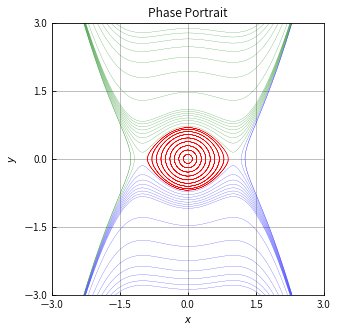

In [ ]:
from scipy.integrate import solve_ivp

def myODE(t, y):
    return [y[1], y[0]**3 -y[0]]

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

td = 50
x0 = 0
for i in range(9):
    x0 = x0 +0.1
    sol = solve_ivp(myODE, [0, td], [x0, 0], t_eval = np.linspace(0, td, 200))    
    ax.plot(sol.y[0], sol.y[1], 'r-', linewidth = 0.2)

x0 = 1.5
for i in range(8):
    x0 = x0 +0.1
    sol = solve_ivp(myODE, [0, td], [x0, -3], t_eval = np.linspace(0, td, 2000))    
    ax.plot(sol.y[0], sol.y[1], 'b-', linewidth = 0.2)     
    
x0 = 2.25
for i in range(10):
    x0 = x0 +0.005
    sol = solve_ivp(myODE, [0, td], [x0, -3], t_eval = np.linspace(0, td, 2000))    
    ax.plot(sol.y[0], sol.y[1], 'b-', linewidth = 0.2)    

x0 = -1.5
for i in range(8):
    x0 = x0 -0.1
    sol = solve_ivp(myODE, [0, td], [x0, 3], t_eval = np.linspace(0, td, 2000))    
    ax.plot(sol.y[0], sol.y[1], 'g-', linewidth = 0.2)     
    
x0 = -2.25
for i in range(10):
    x0 = x0 -0.005
    sol = solve_ivp(myODE, [0, td], [x0, 3], t_eval = np.linspace(0, td, 2000))    
    ax.plot(sol.y[0], sol.y[1], 'g-', linewidth = 0.2) 
    
ax.set_title('Phase Portrait')

w = 3
ax.axis((-w, w, -w, w))
ax.set_aspect(aspect='equal')
ax.grid()
   
ax.tick_params(axis='both', direction='in', pad=5)     
ax.xaxis.set_ticks(np.linspace(-w, w, 5))
ax.set_xlabel(r'$x$')
ax.yaxis.set_ticks(np.linspace(-w, w, 5))
ax.set_ylabel(r'$y$')
plt.show()

### Exercises 11.3

* 1

## 11.4 Autonomous Systems as Mathematical Models

Many applications from physics and biology give rise to nonlinear autonomous second-order DEs $x''=g(x,x')$

#### Nonlinear Pendulum

>$\displaystyle\frac{d^2\theta}{dt^2} +\frac{g}{l}\sin\theta=0$

When we let $x=\theta$ and $y=\theta'$, this second-order differential equation may be rewritten as the
dynamical system

>$
\begin{align*}
  x' &= y\\ 
  y' &= -\frac{g}{l}\sin x
\end{align*}
$

The critical points are $(\pm k\pi,0)$, and the Jacobian matrix is easily shown to be

>$\mathbf{g}'((\pm k \pi,0))=
\begin{pmatrix}
 0 & 1\\ 
 (-1)^{k+1}\frac{g}{l} & 0 
\end{pmatrix}$

If $k=2n+1$, $\Delta<0$, and so all critical points $(\pm(2n+1)\pi,0)$ are saddle points. When
$k=2n$, the eigenvalues are pure imaginary, and so the nature of these critical points remains in doubt.
From

>$\displaystyle\frac{dy}{dx}=\frac{dy/dt}{dx/dt}=-\frac{g}{l}\frac{\sin x}{y}$

is follows that 

>$\displaystyle y^2=\frac{2g}{l}\cos x +c$

If $\mathbf{x}(0)=(x_0,0)$, then 

>$\displaystyle y^2=\frac{2g}{l}(\cos x -\cos x_0)$

Note that $y=0$ when $x=-x_0$, and that $(2g/l)(\cos x -\cos x_0)>0$ for $|x|<|x_0|<\pi$. Thus each
such $x$ has two corresponding values of $y$, and so the solution $\mathbf{x}(t)$ that satisfies 
$\mathbf{x}(0)=(x_0,0)$ is periodic. We may conclude that $(0,0)$ is a center. 
In the case of large initial velocities, the pendulum spins in complete circles about the pivot

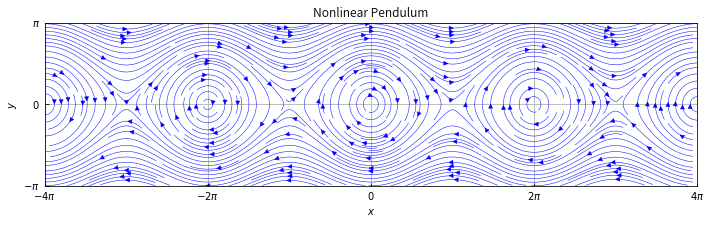

In [ ]:
w1 = 4*np.pi
w2 = np.pi
xp = np.linspace(-w1, w1, 200)
yp = np.linspace(-w2, w2, 200)
x, y = np.meshgrid(xp, yp)

fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(111)

g = 9.8
l = 8
xdot = y
ydot = -g/l*np.sin(x)
      
ax.streamplot(x, y, xdot, ydot, density = 3, linewidth = 0.5, color='blue')

ax.set_title('Nonlinear Pendulum')

ax.axis((-w1, w1, -w2, w2))
ax.set_aspect(aspect='equal')
ax.grid()
    
ax.tick_params(axis='both', direction='in', pad=5)     
ax.xaxis.set_ticks(np.linspace(-w1, w1, 5))
ax.xaxis.set_ticklabels([r'$-4\pi$', r'$-2\pi$', r'$0$', r'$2\pi$', r'$4\pi$'])
ax.set_xlabel(r'$x$')
ax.yaxis.set_ticks(np.linspace(-w2, w2, 3))
ax.yaxis.set_ticklabels([r'$-\pi$', r'$0$', r'$\pi$'])
ax.set_ylabel(r'$y$')
plt.show()

#### Periodic Solutions of the Pendulum DE

Suppose a bead with mass $m$ slides along a thin wire whose shape is described by the function $z=f(x)$.
A wide variety of nonlinear oscillations can be obtained by changing the shape of the wire and by making
different assumptions about the forces acting on the bead

<img src="figures/ch11_figure06.png" width="250">

The tangential force $\mathbf{F}$ due to the weight $W=mg$ has a magnitude $mg\sin\theta$, and therefore
the $x$-component of $\mathbf{F}$ is $F_x=-mg\sin\theta\cos\theta$. Since $\tan\theta=f'(x)$, we can
use the identity $1+\tan^2\theta=\sec^2\theta$ to conclude that

>$\displaystyle F_x=-mg\sin\theta\cos\theta=-mg\tan\theta\cos^2\theta=-mg\frac{f'(x)}{1 +\left[f'(x)\right]^2}$

A damping force $\mathbf{D}$, in the direction opposite to the motion, is a constant multiple of the velocitcy 
of the bead. The $x$-component of $\mathbf{D}$ is therefore

>$\displaystyle D_x=-\beta\frac{dx}{dt}$

It follows from Newton's second law that

>$\displaystyle mx''=-mg\frac{f'(x)}{1 +\left[f'(x)\right]^2}-\beta x'$

and the corresponding plane autonomous system is

>$
\begin{align*}
   x' &= y\\ 
   y' &= -g\frac{f'(x)}{1 +\left[f'(x)\right]^2}-\frac{\beta}{m} y
\end{align*}
$

If $\mathbf{x}_1=(x_1,y_1)$ is a critical point of the system, $y_1=0$ and therefore $f'(x_1)=0$. 
The bead must therefore be at rest at a point on the wire where the tangent line is horizontal.
When $f$ is twice differentiable, the Jacobian matrix at $\mathbf{x}_1$ is

>$
\mathbf{g}'(\mathbf{x}_1)=
\begin{pmatrix}
 0 & 1\\ 
 -g f''(x_1) & -\frac{\beta}{m} 
\end{pmatrix}
$

and so $\tau=-\beta/m$, $\Delta=gf''(x_1)$, and $\tau^2 -4\Delta=\beta^2/m^2 -4gf''(x_1)$. We can make
the following conclusions:

(1) $f''(x_1)<0$:
   
> A relative maximum therefore occurs at $x=x_1$, and since $\Delta<0$, an unstable saddle point occurs
at $\mathbf{x}_1=(x_1,0)$  

(2) $f''(x_1)>0$ and $\beta>0$:

> A relative minimum therefore occurs at $x=x_1$, and since $\tau<0$ and $\Delta>0$, $\mathbf{x}_1=(x_1,0)$ 
is a stable critical point. If $\beta^2 > 4gm^2f''(x_1)$, the system is **overdamped** and the critical point
is a stable node. If $\beta^2 < 4gm^2f''(x_1)$, the system is **underdamped** and the critical point is a
stable spiral point. The exact nature of the stable critical point is still in doubt if $\beta^2 = 4gm^2f''(x_1)$

(3) $f''(x_1)>0$ and the system is undamped ($\beta=0$):

> In this case the eigenvalues are pure imaginary, but the phase-plane method can be used to show that
the critical point is a center. Therefore solutions with $\mathbf{x}(0)=(x(0),x'(0))$ near 
$\mathbf{x}_1=(x_1,0)$ are periodic

---
**Example:** A bead is released from the position $x(0)=x_0$ on the curve $z=\cosh (x)$ with initial velocity
$x'(0)=\nu_0$. Use the phase-plane method to show that the resulting solution is periodic when the system
is undamped

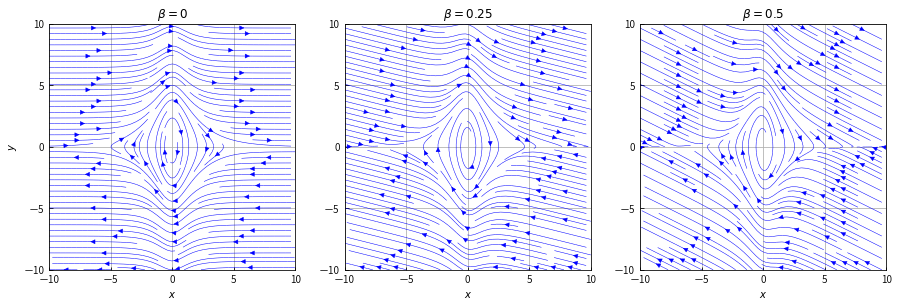

In [ ]:
w = 10
xp = np.linspace(-w, w, 200)
yp = np.linspace(-w, w, 200)
x, y = np.meshgrid(xp, yp)

fig = plt.figure(figsize=(15, 5))

g = 9.8
m = 1
beta = [0, 0.25, 0.5]

sb_title = [r'$\beta=0$', r'$\beta=0.25$', r'$\beta=0.5$']

def df(x):
    return np.sinh(x)

for i in range(3):
    
    xdot = y
    ydot = -g*df(x)/(1 +df(x)**2) -beta[i]/m*y

    ax = fig.add_subplot(1, 3, i +1)
    ax.streamplot(x, y, xdot, ydot, density = 1.5, linewidth = 0.5, color='blue')

    ax.set_title(sb_title[i])

    ax.axis((-w, w, -w, w))
    ax.set_aspect(aspect='equal')
    ax.grid()
    
    ax.tick_params(axis='both', direction='in', pad=5)     
    ax.xaxis.set_ticks(np.linspace(-w, w, 5))
    ax.set_xlabel(r'$x$')
    ax.yaxis.set_ticks(np.linspace(-w, w, 5))
    if i == 0:
        ax.set_ylabel(r'$y$')
    
plt.show()

#### Lotka-Volterra Predator-Prey Model

There are many predator-prey models that lead to plane autonomous systems with at least one periodic solution.
The first such model was constructed independently by pioneer biomathematicians A. Lotka (1925) and
V. Volterra (1926). If $x$ denotes the number of predators and $y$ denotes the number of prey, then
the Lotka-Volterra model takes the form

>$
\begin{align*}
 x' &= -ax +bxy = x(-a +by)\\ 
 y' &= -cxy +dy = y(-cx +d)
\end{align*}
$

where $a$, $b$, $c$, and $d$ are positive constants. The critical points of this plane autonomous system are
$(0,0)$ and $(d/c,a/b)$, and the corresponding Jocobian matrices are

>$
\mathbf{A}_1=\mathbf{g}'((0,0))=
\begin{pmatrix}
  -a & 0\\ 
   0 & d
\end{pmatrix}\;
$ and
$
\;\mathbf{A}_2=\mathbf{g}'((d/c,a/b))=
\begin{pmatrix}
   0 & bd/c\\ 
  -ac/b & 0
\end{pmatrix}\;
$

The critical point $(0,0)$ is a saddle point. Since $\mathbf{A}_2$ has pure imaginary eigenvalues 
$\lambda=\pm i\sqrt{ad}$, the critical point $(d/c,a/b)$ may be a center. This possibility can be
investigated using the phase-plane method. Since

>$\displaystyle\frac{dy}{dx}=\frac{y(-cx +d)}{x(-a +by)}$

we may separate variables and obtain

>$\displaystyle \int\frac{-a +by}{y}\,dy=\int\frac{-cx +d}{x}\,dx$

so that

>$\left(x^d e^{-cx}\right)\left(y^a e^{-by}\right)=F(x)G(y)=c_0$

Typical graphs of the nonnegative functions $F(x)=x^d e^{-cx}$ and $G(y)=y^a e^{-by}$ are shown in

<img src="figures/ch11_figure07.png" width="500">

It is not hard to show that $F(x)$ has an absolute maximum at $x=d/c$, whereas $G(y)$ has an absolute maximum
at $y=a/b$. These graphs can be used to establish the following properties of a solution curve that orginates at
a noncritical point $(x_0,y_0)$ in the first quadrant

(1) If $y=a/b$, the equation $F(x)G(a/b)=c_0$ has two solutions $x_m$ and $x_M$ that satisfy $x_m<d/c<x_M$

(2) If $x_m<x_1<x_M$ and $x=x_1$, then $F(x_1)G(y)=c_0$ has exactly two solutions $y_1$ and $y_2$ that
    satisfy $y_1<a/b<y_2$

(3) If $x$ is outside the interval $[x_m,x_M]$, then $F(x)G(y)=c_0$ has no solutions

---
**Example:** If we let $a=0.1$, $b=0.002$, $c=0.0025$, and $d=0.2$ in the Lotka-Volterra predator-prey model,
the critical point in the first quadrant is $(d/c,a/b)=(80,50)$, and we know that this critical point is a center.
The eigenvalues of $\mathbf{g}'((80,50))$ are $\lambda=\pm(\sqrt{2}/10)i$, and so the solutions near the
critical point have period $p\simeq 10\sqrt{2}\pi$

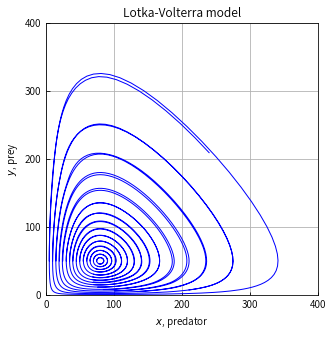

In [ ]:
a = 0.1
b = 0.002
c = 0.0025
d = 0.2

def myODE(t, y):
    return [-a*y[0] +b*y[0]*y[1], -c*y[0]*y[1] +d*y[1]]

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

td = 80
x0 = 0
y0 = 50
for i in range(15):
    x0 = x0 +5
    sol = solve_ivp(myODE, [0, td], [x0, y0], t_eval = np.linspace(0, td, 300))    
    ax.plot(sol.y[0], sol.y[1], 'b-', linewidth = 1)
    
ax.set_title('Lotka-Volterra model')

w = 400
ax.axis((0, w, 0, w))
ax.set_aspect(aspect='equal')
ax.grid()
   
ax.tick_params(axis='both', direction='in', pad=5)     
ax.xaxis.set_ticks(np.linspace(0, w, 5))
ax.set_xlabel(r'$x$, predator')
ax.yaxis.set_ticks(np.linspace(0, w, 5))
ax.set_ylabel(r'$y$, prey')
plt.show()

#### Lotka-Volterra Competition Model

A **competitive interaction** occurs when two or more species compete for the food, water, light, and species
resources of an ecosystem. A number of mathematical models have been constructed that offer insights into conditions
that permit *coexistence*. If $x$ denotes the number in species I and $y$ denotes the number in species II, then
the Lotka-Volterra model takes the form

>$
\begin{align*}
 x' &= \frac{r_1}{K_1} x(K_1 -x -\alpha_{12}y)\\ 
 y' &= \frac{r_2}{K_2} y(K_2 -y -\alpha_{21}x)
\end{align*}
$

Note that in the absence of species II ($y=0$), $x'=(r_1/K_1)x(K_1 -x)$, and so the first population grows logistically
and approaches the steady-state population $K_1$. A similar statement holds for species II growing in the 
absence of speices I. The term $-\alpha_{21}xy$ in the second equation stems from the competitive effect
of species I on species II. The model therefore assumes that this rate of inhibition is directly proportional to
the number of possible competitive pairs $xy$ at a particular $t$

This plane autonomous system has critical points at $(0,0)$, $(K_1,0)$, and $(0,K_2)$. When 
$\alpha_{12}\alpha_{21}\neq 0$, the lines $K_1 -x -\alpha_{12}y=0$ and $K_2 -y -\alpha_{21}x=0$ intersect to
produce a fourth critical point $\hat{\mathbf{x}}=(\hat{x},\hat{y})$

>$\displaystyle \hat{x}=\frac{K_1 -\alpha_{12}K_2}{1 -\alpha_{12}\alpha_{21}},\;
  \hat{y}=\frac{K_2 -\alpha_{21}K_1}{1 -\alpha_{12}\alpha_{21}}$

**Example:** A competitive interaction is described by the Lotka-Volterra competition model

>$
\begin{align*}
 x' &= 0.004 x(50 -x -0.75y)\\ 
 y' &= 0.001 y(100 -y -3.0x)
\end{align*}
$

Find and classify all critical points of the system

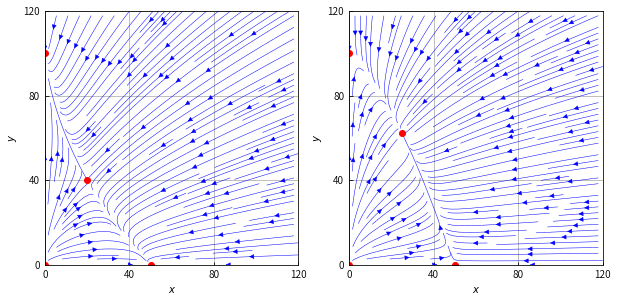

In [ ]:
w = 120
xp = np.linspace(0, w, 200)
yp = np.linspace(0, w, 200)
x, y = np.meshgrid(xp, yp)

fig = plt.figure(figsize=(10, 5))

r1_K1 = 0.004
r2_K2 = 0.001
K1 = 50
K2 = 100
a_12 = np.array([0.75, 0.4])
a_21 = np.array([3.00, 1.5])

for i in range(2):
    
    ax = fig.add_subplot(1, 2, i +1)
    
    xdot = r1_K1*x*(K1 -x -a_12[i]*y)
    ydot = r2_K2*y*(K2 -y -a_21[i]*x)

    cpt_x = np.array([0, K1, 0, (K1 -a_12[i]*K2)/(1 -a_12[i]*a_21[i])])
    cpt_y = np.array([0, 0, K2, (K2 -a_21[i]*K1)/(1 -a_12[i]*a_21[i])])

    ax.streamplot(x, y, xdot, ydot, density = 1.5, linewidth = 0.5, color='blue')
    ax.plot(cpt_x, cpt_y, 'ro')
    #ax.set_title('Lotka-Volterra Competition Model')

    ax.axis((0, w, 0, w))
    ax.set_aspect(aspect='equal')
    ax.grid()
    
    ax.tick_params(axis='both', direction='in', pad=5)     
    ax.xaxis.set_ticks(np.linspace(0, w, 4))
    ax.set_xlabel(r'$x$')
    ax.yaxis.set_ticks(np.linspace(0, w, 4))
    ax.set_ylabel(r'$y$')
    
plt.show()

### Exercises 11.4

* 1

## 11.5 Periodic Solutions, Limit Cycles, and Global Stability

In this section we will investigate the existence of periodic solutions of nonlinear plane autonomous systems
and introduce special periodic solutions called **limit cycles**

An analysis of critical points using linearization can provide valuable information on the behavior of solutions
near critical points and insight into a variety of biological and physical phenomena. However there are some
inherent limitations to this approach. When the eigenvalues of the Jacobian matrix are pure imaginary,
we cannot conclude that there are periodic solutions near the critical point

The first goal of this section is *to determine conditions under which we can either exclude the possibility
of periodic solutions or assert their existence*

A second goal is *to determine conditions under which an asymptotically stable critical point is globally 
stable*: $\lim_{t \to \infty}\mathbf{x}(t)=\mathbf{x}_1$ for all initial conditions in 
a simply connected region $\mathbb{R}$

#### **Negative Criteria**

**Theorem** If a plane autonomous system has a periodic solution $\mathbf{x}=\mathbf{x}(t)$ in a simply 
connected region $\mathbb{R}$, then the system has at least one critical point inside the corresponding
simple closed curve $C$. If there is a single critical point inside $C$, then that critical point cannot be a 
saddle point

**Corollary** If a simply connected region $\mathbb{R}$ either contains no critical points of a plane autonomous
system or contains a single saddle point, then there are no periodic solutions in $\mathbb{R}$

**Example:** Show that the Lotka-Volterra competition model

>$
\begin{align*}
 x' &= 0.004 x(50 -x -0.75y)\\ 
 y' &= 0.001 y(100 -y -3.0x)
\end{align*}
$

has no periodic solutions in the first quadrant

Another sometimes useful result can be formulated in terms of the divergence of the vector field 
$\mathbf{v}(x,y)=\left(P(x,y), Q(x,y)\right)$:

**Bendixson Negative Criterion**

If $\displaystyle\mathrm{div}\,\mathbf{v}=\frac{\partial P}{\partial x} +\frac{\partial Q}{\partial y}$ does not
change sign in a simply connected region $\mathbb{R}$, then the plane autonomous system has no periodic solutions
in $\mathbb{R}$

*Proof:* Suppose, to the contrary, that there is a periodic solution $\mathbf{x}=\mathbf{x}(t)$ in $\mathbb{R}$,
and let $C$ be the resulting simple closed curve and $R_1$ the region bounded by $C$. By using Green's theorem,
we obtain

>$\displaystyle\int_C -Q(x,y)\,dx +P(x,y)\,dy=\iint_{R_1} 
    \left(\frac{\partial P}{\partial x} +\frac{\partial Q}{\partial y}\right)\, dxdy$
    
Since $\mathbf{x}=\mathbf{x}(t)$ is a solution with period $p$, we have $x'(t)=P(x(t),y(t))$ and
$y'(t)=Q(x(t),y(t))$, and so

>$
\begin{align*}
 \int_C -Q(x,y)\,dx +P(x,y)\,dy &= \int_0^p \left[-Q(x(t),y(t))\,x'(t) +P(x(t),y(t))\,y'(t) \right]\,dt\\ 
   &= \int_0^p -QP +PQ \,dt = 0
\end{align*}
$

Since $\displaystyle\mathrm{div}\,\mathbf{v}=\frac{\partial P}{\partial x} +\frac{\partial Q}{\partial y}$ is
continuous and does not change sign in $\mathbb{R}$, it follows that either $\mathrm{det}\,\mathbf{v}\geq 0$
or $\mathrm{det}\,\mathbf{v}\leq 0$ in $\mathbb{R}$, and so

>$\displaystyle
  \iint_{R_1} \left(\frac{\partial P}{\partial x} +\frac{\partial Q}{\partial y}\right)\, dxdy \neq 0
$

This contradiction establishes that there are no periodic solutions in $\mathbb{R}$

**Example:** The sliding bead satisfies the differential equation

>$\displaystyle mx''=-mg\frac{f'(x)}{1 +\left[f'(x)\right]^2}-\beta x'$

Show that there are no periodic solutions

*Solution:* The corresponding plane autonomous system is

>$
\begin{align*}
   x' &= y\\ 
   y' &= -g\frac{f'(x)}{1 +\left[f'(x)\right]^2}-\frac{\beta}{m} y
\end{align*}
$

and so 

>$\displaystyle
  \mathrm{div}\,\mathbf{v}=\frac{\partial P}{\partial x} +\frac{\partial Q}{\partial y}=-\frac{\beta}{m}<0$

**Dulac Negative Criterion**

If $\delta(x,y)$ has continuous first partial derivatives in a simply connected region $\mathbb{R}$ and
$\displaystyle \frac{\partial (\delta P)}{\partial x} +\frac{\partial (\delta Q)}{\partial y}$ does not
change sign in $\mathbb{R}$, then the plane autonomous system has no periodic solutions in $\mathbb{R}$

**Example:** Use $\delta(x,y)=1/(xy)$ to show that the Lotka-Volterra competition equations

>$
\begin{align*}
 x' &= \frac{r_1}{K_1} x(K_1 -x -\alpha_{12}y)\\ 
 y' &= \frac{r_2}{K_2} y(K_2 -y -\alpha_{21}x)
\end{align*}
$

have no periodic solutions in the first quadrant

*Solution:* If $\delta(x,y)=1/(xy)$, then

>$\displaystyle\frac{\partial (\delta P)}{\partial x} +\frac{\partial (\delta Q)}{\partial y}=
  \frac{r_1}{K_1}\left(-\frac{1}{y}\right) +\frac{r_2}{K_2}\left(-\frac{1}{x}\right) <0$

in the first quadrant

#### **Positive Criteria**

A region $\mathbb{R}$ is called an **invariant region** for a plane autonomous system if, whenever $\mathbf{x}_0$
is in $\mathbb{R}$, the solution $\mathbf{x}=\mathbf{x}(t)$ remains in $\mathbb{R}$. If
$\mathbf{n}(x,y)$ denotes a normal vector on the boundary that points inside the region, then $\mathbb{R}$ will
be an invariant region for the plane autonomous system provided $\mathbf{v}(x,y)\cdot\mathbf{n}(x,y)\geq 0$
for all points $(x,y)$ in the boundary

<img src="figures/ch11_figure08.png" width="200">

**Poincar$\acute{\textbf{e}}$-Benedixon I**

Let $\mathbb{R}$ be an invariant region for a plane autonomous system and suppose that $\mathbb{R}$ has no
critical points on its boundary

(a) If $\mathbb{R}$ is a type I region that has a single unstable node or an unstable spiral point
    in its interior, then there is at least one periodic solution in $\mathbb{R}$

(b) If $\mathbb{R}$ is a type II region that contains no critical points of the system, then
    there is at least one periodic solution in $\mathbb{R}$
    
In either of the two cases, if $\mathbf{x}=\mathbf{x}(0)$ is a nonperiodic solution in $\mathbb{R}$, then
$\mathbf{x}(t)$ spirals toward a cycle that is a solution to the system. This periodic solution is called
a **limit cycle**

**Example:** The Van der Pol equation is a nonlinear second-order differential equation that arises in electronics,
and as a plane autonomous system it takes the form

>$\begin{align*}
 x' &= y\\ 
 y' &= -\mu (x^2 -1)y -x
\end{align*}$

Show that the Van der Pol DE has a periodic solution when $\mu>0$

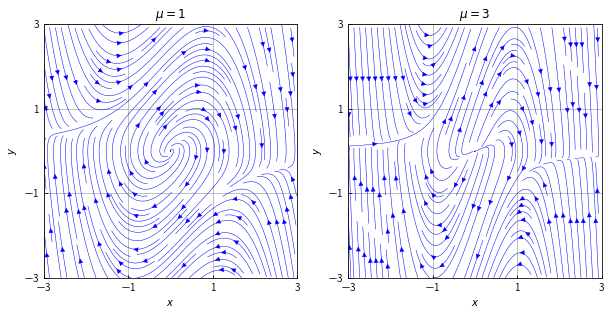

In [ ]:
w = 3
xp = np.linspace(-w, w, 100)
yp = np.linspace(-w, w, 100)
x, y = np.meshgrid(xp, yp)

fig = plt.figure(figsize=(10, 5))

mu = np.array([1, 3])
vdp_title = [r'$\mu=1$', r'$\mu=3$']

for i in range(2):
    
    ax = fig.add_subplot(1, 2, i +1)
    
    xdot = y
    ydot = -mu[i]*(x*x -1)*y -x

    ax.streamplot(x, y, xdot, ydot, density = 1.5, linewidth = 0.5, color='blue')
    ax.set_title(vdp_title[i])

    ax.axis((-w, w, -w, w))
    ax.set_aspect(aspect='equal')
    ax.grid()
    
    ax.tick_params(axis='both', direction='in', pad=5)     
    ax.xaxis.set_ticks(np.linspace(-w, w, 4))
    ax.set_xlabel(r'$x$')
    ax.yaxis.set_ticks(np.linspace(-w, w, 4))
    ax.set_ylabel(r'$y$')
    
plt.show()

We will assumme that there is a Type I invariant region $\mathbb{R}$ for the corresponding plane autonomous system 
and that this region contains $(0,0)$ in its interior. The only critical point is $(0,0)$, and the Jacobian matrix
is given by

>$
\mathbf{g}'((0,0))=
\begin{pmatrix}
 \;\;0 & 1\\ 
 -1 & \mu
\end{pmatrix}
$

Therefore, $\tau=\mu$, $\Delta=1$, and $\tau^2 -4\Delta=\mu^2-4$. Since $\mu >0$, the critical point is either
an unstable spiral point or an unstable node. By part (a) of **Poincar$\acute{\textbf{e}}$-Benedixon I**, 
the system has at least one periodic solution in $\mathbb{R}$.

In [ ]:
td = 100

mu = np.array([1, 3])
x0 = np.array([[0.5, 0.5], [3, 3]])
vdp_title = [r'$\mu=1$', r'$\mu=3$']

fig = plt.figure(figsize=(10, 5))

for i in range(2):
    
    def myODE(t, y):
        return [y[0], -mu[i]*(y[0]*y[0] -1)*y[1] -y[0]]

    ax = fig.add_subplot(1, 2, i +1)
    
    for j in range(2):
        y0 = x0[j]
        sol = solve_ivp(myODE, [0, td], y0, t_eval = np.linspace(0, td, 300))    
        ax.plot(sol.y[0], sol.y[1], 'b-', linewidth = 1)
    
    ax.set_title(vdp_title[i])

    ax.axis((-w, w, -w, w))
    ax.set_aspect(aspect='equal')
    ax.grid()
    
    ax.tick_params(axis='both', direction='in', pad=5)     
    ax.xaxis.set_ticks(np.linspace(-w, w, 4))
    ax.set_xlabel(r'$x$')
    ax.yaxis.set_ticks(np.linspace(-w, w, 4))
    ax.set_ylabel(r'$y$')
    
plt.show()